# Predicting the heart disease or not

## 1.Problem Definition
With the give data we have to predict whether the person is having heart disease or not
## 2.Data Definition
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

DATA LINK:https://archive.ics.uci.edu/dataset/45/heart+disease
## 3 Evaluation
We need 95%+ accuracy to pursue with this project
## 4.Features details 
We can refer to the data link given above for the features details

## Preparing the tools

In [1]:
#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#ModelEvaluation
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

#Saving model
import pickle

In [2]:
#Loading the data
hd=pd.read_csv("heart-disease.csv")
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# EDA

In [3]:
hd["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

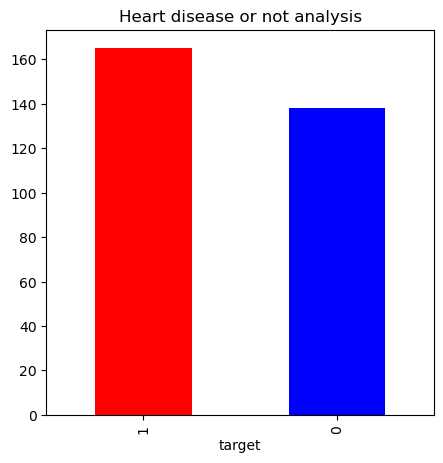

In [4]:
hd["target"].value_counts().plot(kind='bar',color=['red','blue'],figsize=(5,5))
plt.title("Heart disease or not analysis");
#Target 0 is not heart disease and 1 for heart disease

In [5]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
hd['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [8]:
pd.crosstab(hd.target,hd.sex)

sex,0,1
target,,
0,24,114
1,72,93


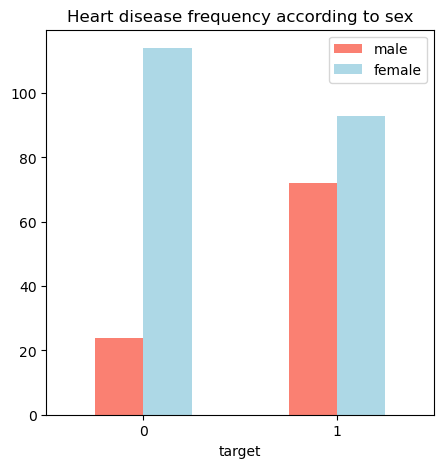

In [9]:
#Sex 0 is for female and 1 is for male
#Target 0 is not heart disease and 1 for heart disease
pd.crosstab(hd.target,hd.sex).plot(kind='bar',color=['salmon','lightblue'],figsize=(5,5))
plt.title("Heart disease frequency according to sex");
plt.legend(['male','female'])
plt.xticks(rotation=0);

In [10]:
pd.crosstab(hd.cp,hd.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


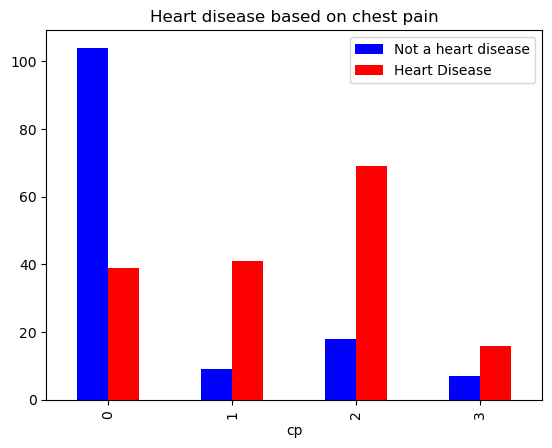

In [11]:
pd.crosstab(hd.cp,hd.target).plot(kind='bar',color=['blue','red'])
plt.title("Heart disease based on chest pain")
plt.legend(['Not a heart disease','Heart Disease']);

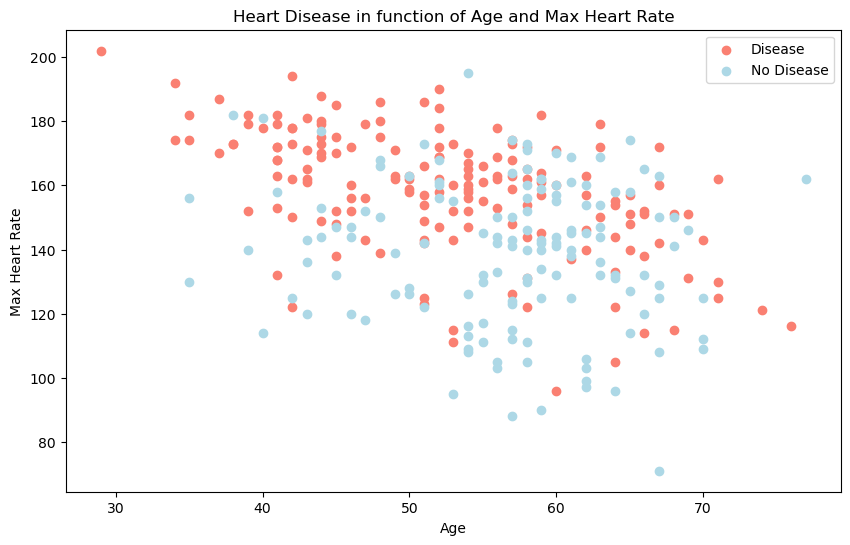

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(hd.age[hd.target==1],
            hd.thalach[hd.target==1],
            c="salmon")
plt.scatter(hd.age[hd.target==0],
            hd.thalach[hd.target==0],
            c="lightblue")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

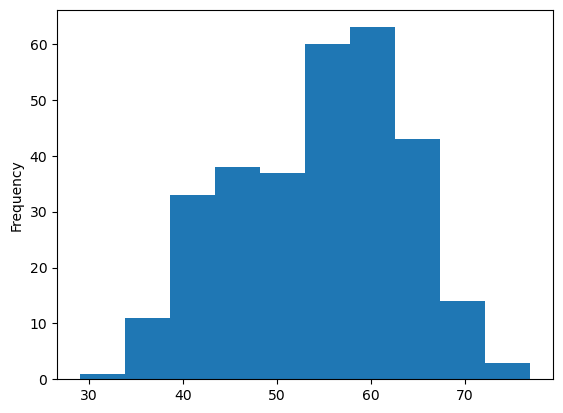

In [13]:
hd.age.plot(kind='hist');

In [14]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


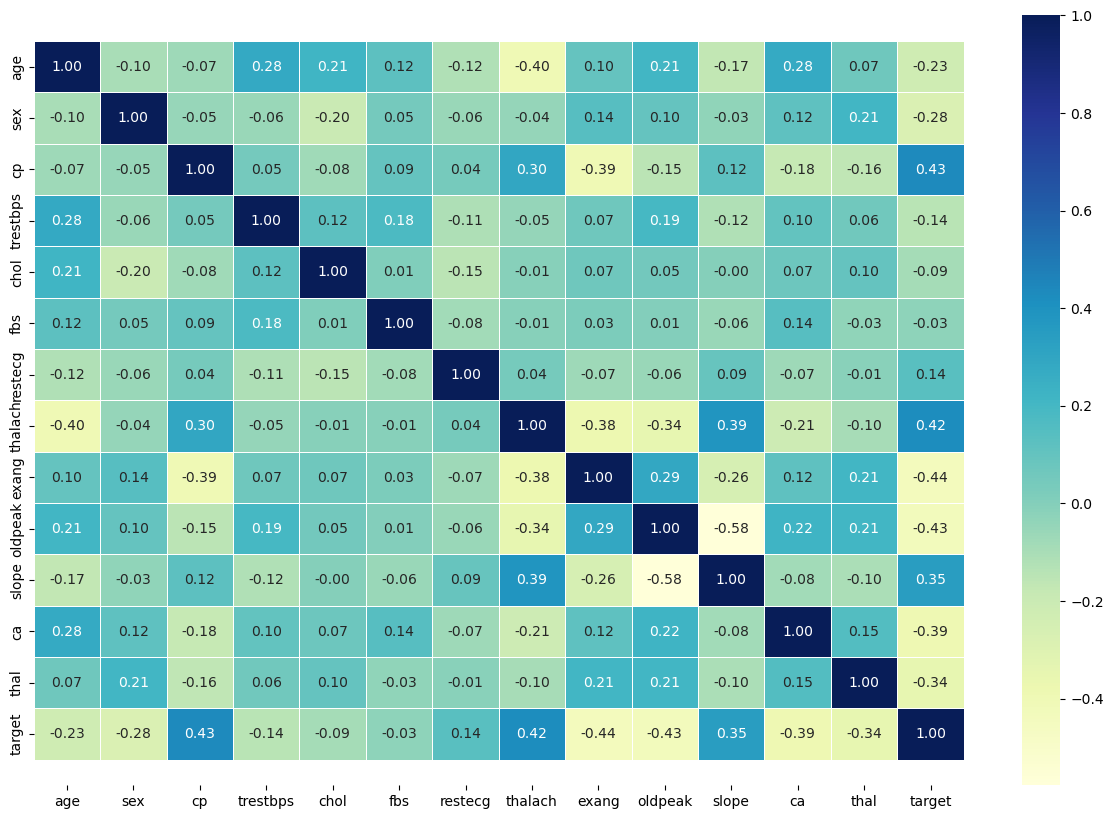

In [16]:
corr_matrix=hd.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

## Modeling

In [17]:
X=hd.drop('target',axis=1)
Y=hd.target
np.random.seed(42)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [18]:
len(X_train)

242

In [19]:
len(Y_test)

61

In [20]:
models={"Logistic":LogisticRegression(),
       "Neighbours":KNeighborsClassifier(),
       "RandomForest":RandomForestClassifier()}
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    model_scores={}
    for names,model in models.items():
        model.fit(X_train,Y_train)
        model_scores[names]=model.score(X_test,Y_test)
    return model_scores

In [21]:
scores=fit_and_score(models=models,
                    X_train=X_train,
                    X_test=X_test,
                    Y_train=Y_train,
                    Y_test=Y_test)

/home/vedant/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
scores

{'Logistic': 0.8852459016393442,
 'Neighbours': 0.6885245901639344,
 'RandomForest': 0.8524590163934426}

In [23]:
result=pd.DataFrame(scores,index=["accuracy"])

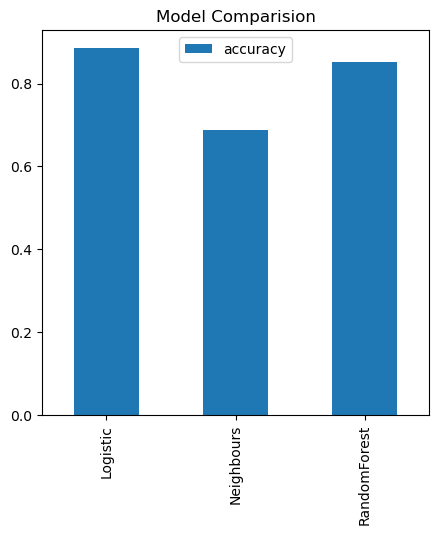

In [24]:
result.T.plot(kind='bar',figsize=(5,5))
plt.title("Model Comparision");

Conclusion:We should move on with the logisticregression model and RandomForest model as it is having more accuracy

# Tuning Hyperparameters

In [25]:
# Creating a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Creating a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [26]:
gs_log_reg_grid=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
gs_log_reg_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [27]:
gs_log_reg_grid.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [28]:
G_log=LogisticRegression(C=0.23357214690901212,solver='liblinear')

In [29]:
G_log.fit(X_train,Y_train)
G_log.score(X_test,Y_test)

0.8852459016393442

In [30]:
np.random.seed(42)
rs_rf_grid=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=10,verbose=True,)
rs_rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [31]:
rs_rf_grid.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [32]:
R_ran=RandomForestClassifier(n_estimators=310,min_samples_split=2,min_samples_leaf=19,max_depth=5)
R_ran.fit(X_train,Y_train)
R_ran.score(X_test,Y_test)

0.8688524590163934

# Evaluating the model

In [33]:
Y_preds=G_log.predict(X_test)

In [34]:
Y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

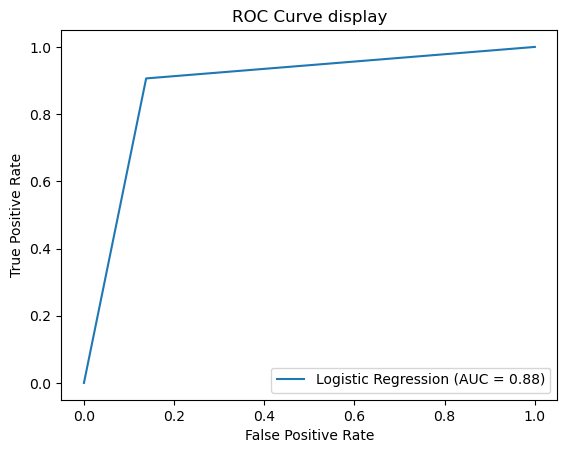

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Logistic Regression')
display.plot()
plt.title("ROC Curve display")
plt.show()

In [36]:
cm=confusion_matrix(Y_preds,Y_test)

Text(0.5, 1.0, 'Confusion matrix')

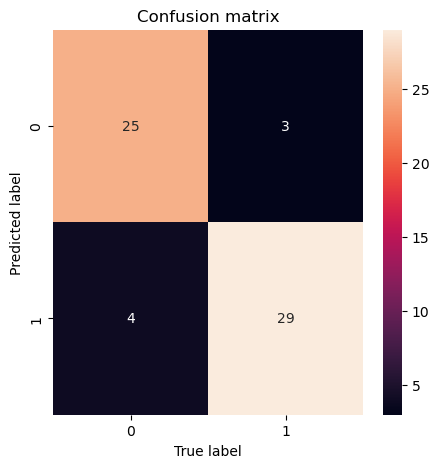

In [37]:
plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title("Confusion matrix")

In [38]:
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [39]:
cv_acc=cross_val_score(G_log,X,Y,cv=5,scoring="accuracy")

In [40]:
cv_acc=np.mean(cv_acc)

In [41]:
cv_acc

0.8479781420765027

In [42]:
cv_pre=cross_val_score(G_log,X,Y,cv=5,scoring="precision")

In [43]:
cv_pre=np.mean(cv_pre)

In [44]:
cv_pre

0.8215873015873015

In [45]:
cv_re=cross_val_score(G_log,X,Y,cv=5,scoring="recall")

In [46]:
cv_re=np.mean(cv_re)

In [47]:
cv_re

0.9272727272727274

In [48]:
cv_f1=cross_val_score(G_log,X,Y,cv=5,scoring="f1")

In [49]:
cv_f1=np.mean(cv_f1)

In [50]:
cv_f1

0.8705403543192143

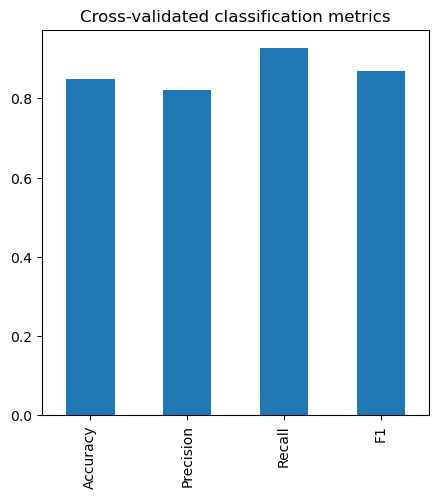

In [51]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,"Precision": cv_pre,"Recall": cv_re,"F1": cv_f1},index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False,figsize=(5,5));

# Feature Importance

In [52]:
fmatrix=G_log.coef_

In [53]:
feature_dict = dict(zip(hd.columns, fmatrix[0]))
feature_dict

{'age': 0.003699223396114675,
 'sex': -0.9042409779785583,
 'cp': 0.6747282348693419,
 'trestbps': -0.011613398123390507,
 'chol': -0.0017036431858934173,
 'fbs': 0.0478768694057663,
 'restecg': 0.33490207838133623,
 'thalach': 0.024729380915946855,
 'exang': -0.6312041363430085,
 'oldpeak': -0.5759099636629296,
 'slope': 0.47095166489539353,
 'ca': -0.6516534354909507,
 'thal': -0.6998421698316164}

In [54]:
features_imp=pd.DataFrame(feature_dict,index=[0])

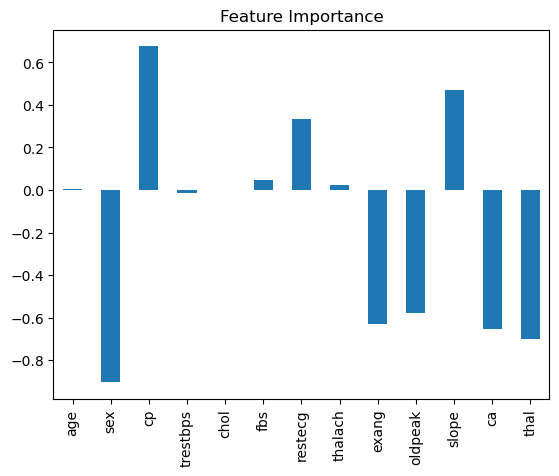

In [55]:
features_imp.T.plot.bar(legend=False)
plt.title("Feature Importance");

# Saving a model

In [56]:
pickle.dump(G_log,open("heart-disease-model.pkl","wb"))

In [57]:
model=pickle.load(open("heart-disease-model.pkl","rb"))

In [58]:
model.score(X_test,Y_test)

0.8852459016393442